## Sample PICARRO run

This notebook emulates the Excel workflow that was proposed by van Geldern (2012).

### Reading the raw data and producing a run summary

First of all, we've got to read the raw data from PICARRO after one analysis.
We check first whether a run line is *empty*.

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/picarro_calculator/picarro-calculator


In [2]:
import Picarro as pica

In [3]:
O18,D = pica.Treat("example_data/HKDS2009_IsoWater_20191010_094459.csv")

No empty cells. Proceeding...
<class 'pandas.core.frame.DataFrame'>
     fun: 0.7371103889409546
     jac: array([-2.86802649e-04,  3.65975499e-03, -3.48632783e-03, -5.58108836e-03,
        2.38309801e-03,  4.88220900e-03, -6.25551492e-03, -1.97117224e-01,
        1.80729389e-01, -7.16009177e-01])
 message: 'Optimization terminated successfully.'
    nfev: 181
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([0.85972078, 0.96557667, 0.98212196, 0.9891532 , 0.99261086,
       0.99696441, 0.99784955, 1.        , 1.        , 1.        ])
No empty cells. Proceeding...
<class 'pandas.core.frame.DataFrame'>
     fun: 10.987779792333036
     jac: array([ 7.49826431e-05,  1.56521797e-04, -3.35216522e-04,  5.03897667e-04,
        8.51035118e-04, -5.71370125e-04,  1.61266327e-03, -3.00620782e+00,
       -2.62611949e+00, -5.35773849e+00])
 message: 'Optimization terminated successfully.'
    nfev: 218
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([0.7638

/Users/AchilleTalon/Documents/GitHub/picarro_calculator/picarro-calculator/Picarro.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col2] = df[col1] - df["Line"]*params["slope"]
/Users/AchilleTalon/Documents/GitHub/picarro_calculator/picarro-calculator/Picarro.py:490: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col1] = df[col2]*params["slope"]+params["intercept"]


In [4]:
O18

,Identifier 1,Identifier 2,d18O_raw,stdev. raw,d18O memory,stdev. memory,d18O drift,stdev. drift,d18O vsmow,stdev. vsmow
0,GNS-02,TR,-14.37400,0.429829,-14.786578,0.171915,-14.711889,0.173531,-11.705772,0.169063
1,GNS-03,TR,-14.34850,0.023445,-14.342605,0.017873,-14.261490,0.019929,-11.266971,0.019416
2,GNS-04,TR,-14.00600,0.005292,-13.989502,0.024849,-13.901963,0.023053,-10.916701,0.022460
3,GNS-05,TR,-14.17350,0.182517,-14.064449,0.069377,-13.964060,0.071436,-10.977200,0.069596
4,GNS-06,TR,-14.08075,0.052829,-14.084201,0.054421,-13.977387,0.055140,-10.990183,0.053721
5,GNS-07,TR,-14.10950,0.028172,-14.111053,0.028704,-13.997814,0.029270,-11.010084,0.028516
6,GNS-08,TR,-13.61650,0.068476,-13.594684,0.059084,-13.475020,0.059036,-10.500751,0.057516
7,GNS-09,TR,-13.15950,0.026901,-13.137064,0.031820,-13.010976,0.030286,-10.048656,0.029506
8,GNS-10,TR,-13.48550,0.075954,-13.499819,0.068073,-13.367305,0.066463,-10.395811,0.064751
9,GNS-11,TR,-13.59300,0.220854,-13.593531,0.227218,-13.454592,0.227279,-10.480850,0.221427


In [5]:
D

,Identifier 1,Identifier 2,d2H_raw,stdev. raw,d2H memory,stdev. memory,d2H drift,stdev. drift,d2H vsmow,stdev. vsmow
0,GNS-02,TR,-75.40675,4.471528,-80.328694,1.427037,-80.816040,1.415219,-82.904771,1.376592
1,GNS-03,TR,-76.69875,0.190897,-76.664074,0.176905,-77.193342,0.168880,-79.380950,0.164271
2,GNS-04,TR,-73.64925,0.523825,-73.413796,0.459912,-73.984987,0.463777,-76.260163,0.451118
3,GNS-05,TR,-74.84600,1.709389,-73.533345,0.416417,-74.188380,0.403115,-76.458004,0.392113
4,GNS-06,TR,-73.69175,0.175492,-73.723705,0.176754,-74.420662,0.179151,-76.683947,0.174261
5,GNS-07,TR,-73.73775,0.353986,-73.699471,0.433266,-74.438351,0.443669,-76.701153,0.431560
6,GNS-08,TR,-69.62150,0.538686,-69.283087,0.244417,-70.063889,0.238391,-72.446086,0.231884
7,GNS-09,TR,-66.06825,0.297649,-65.800570,0.138742,-66.623294,0.141831,-69.099398,0.137960
8,GNS-10,TR,-68.67675,0.213398,-68.908362,0.255472,-69.773009,0.247335,-72.163145,0.240585
9,GNS-11,TR,-69.63725,1.052010,-69.691945,1.115779,-70.598513,1.118626,-72.966118,1.088095


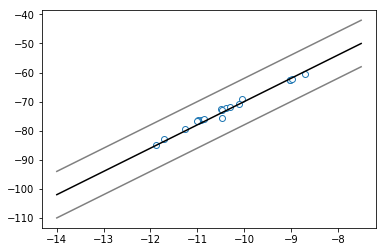

In [26]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax = plt.subplots()
def func(x):
    return 8*x+10

xi = np.arange(-14,-7,0.5)
yi = func(xi)

ax1 = ax.plot(O18.iloc[0:19]["d18O vsmow"],D.iloc[0:19]["d2H vsmow"],'o',markerfacecolor="white")

ax.plot(xi,yi,color = 'black')
ax.plot(xi,yi+8,color = 'grey')
ax.plot(xi,yi-8,color = 'grey')

plt.show()
    